In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import wordcloud

In [437]:
tech_venture_info = pd.read_csv('data/기술보증기금_벤처기업정보_20210228.csv', encoding='cp949')
service_industry_index = pd.read_csv('data/산업별_서비스업생산지수.csv',index_col='업종별',encoding='cp949')
industry_job = pd.read_csv('data/산업별_취업자_20230201103717.csv', encoding='cp949')
customer_movement = pd.read_csv('data/소비자동향조사_전국_1월.csv',index_col='CSI분류코드별', encoding='cp949')
city_industry_type_worker = pd.read_csv('data/시도_산업_사업체구분별_종사자.csv',index_col = '행정구역별', encoding='cp949')
city_industry_company_number = pd.read_csv('data/시도_산업별_사업체수.csv', encoding='cp949')
all_industry = pd.read_csv('data/전산업생산지수_1월.csv',encoding='cp949')

In [397]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts()

font_list = fm.findSystemFonts(fontpaths=None)
font_list
mpl.rcParams['font.family']
plt.style.use("default")

path = '/Users/minholee/Library/Fonts/NanumSquareR.ttf'

font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

NanumSquare


In [159]:
tech_venture_info = tech_venture_info
tech_venture_info.columns

Index(['구분년월', '제조업', '정보처리', '연구개발서비스', '건설운수', '도소매업', '농_어_임_광업', '기타'], dtype='object')

In [160]:
January_tech_venture_info = tech_venture_info['구분년월'].str.contains("-01")
January_tech_venture_info = tech_venture_info[January_tech_venture_info]
January_tech_venture_info #1월 데이터만 추출

,구분년월,제조업,정보처리,연구개발서비스,건설운수,도소매업,농_어_임_광업,기타
0,2013-01,20767,4317,306,400,349,74,2229
12,2014-01,21016,4722,330,420,360,62,2449
24,2015-01,21384,4927,320,431,408,48,2535
36,2016-01,22047,5203,330,464,545,56,2714
48,2017-01,23403,5492,380,518,690,78,2826
60,2018-01,24595,5838,454,598,838,86,3103
72,2019-01,25116,6290,553,640,934,94,3429
84,2020-01,24742,6640,655,678,870,102,3473
96,2021-01,25686,7332,848,788,977,107,3853


In [161]:
January_tech_venture_info_remove_index = January_tech_venture_info.set_index("구분년월")

In [150]:
#sns.displot(data = January_tech_venture_info ,x= January_tech_venture_info["구분년월"].value_counts(), kind="kde")
#
# January_tech_venture_info_remove_index = January_tech_venture_info_remove_index.transpose()
# January_tech_venture_info_remove_index = January_tech_venture_info_remove_index.drop("지울예정", axis =1 )

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(January_tech_venture_info_remove_index)
# sns.displot(data=January_tech_venture_info_remove_index, x = "제조업", kind = 'kde')
# sns.displot(data=January_tech_venture_info_remove_index, x = "정보처리", kind = 'kde')
plt.title("testcase plot graph")
plt.show()
#sub plot


In [168]:
January_tech_venture_info_remove_index = January_tech_venture_info_remove_index.transpose()

In [230]:
jan_tech_bef_df = January_tech_venture_info_remove_index
jan_tech_aft_df = January_tech_venture_info_remove_index

In [231]:
jan_tech_bef_df

구분년월,지울예정,2013-01,2014-01,2015-01,2016-01,2017-01,2018-01,2019-01,2020-01,2021-01
제조업,0,20767,21016,21384,22047,23403,24595,25116,24742,25686
정보처리,0,4317,4722,4927,5203,5492,5838,6290,6640,7332
연구개발서비스,0,306,330,320,330,380,454,553,655,848
건설운수,0,400,420,431,464,518,598,640,678,788
도소매업,0,349,360,408,545,690,838,934,870,977
농_어_임_광업,0,74,62,48,56,78,86,94,102,107
기타,0,2229,2449,2535,2714,2826,3103,3429,3473,3853


In [232]:
jan_tech_aft_df = jan_tech_aft_df.drop(columns='지울예정')

In [179]:
# jan_tech_aft_df.insert(len(jan_tech_aft_df.values), '지울예정', [0 for x in range(len(jan_tech_aft_df.index))])


In [171]:
# jan_tech_bef_df.insert(0, '지울예정', [0 for x in range(len(jan_tech_bef_df.index))])
#copy_df.drop('지울예정',axis=1)

구분년월,지울예정,2013-01,2014-01,2015-01,2016-01,2017-01,2018-01,2019-01,2020-01,2021-01
제조업,0,20767,21016,21384,22047,23403,24595,25116,24742,25686
정보처리,0,4317,4722,4927,5203,5492,5838,6290,6640,7332
연구개발서비스,0,306,330,320,330,380,454,553,655,848
건설운수,0,400,420,431,464,518,598,640,678,788
도소매업,0,349,360,408,545,690,838,934,870,977
농_어_임_광업,0,74,62,48,56,78,86,94,102,107
기타,0,2229,2449,2535,2714,2826,3103,3429,3473,3853


In [233]:
jan_tech_aft_df['지울예정'] = [0 for x in range(len(jan_tech_aft_df.index))]

In [234]:
jan_tech_aft_df

구분년월,2013-01,2014-01,2015-01,2016-01,2017-01,2018-01,2019-01,2020-01,2021-01,지울예정
제조업,20767,21016,21384,22047,23403,24595,25116,24742,25686,0
정보처리,4317,4722,4927,5203,5492,5838,6290,6640,7332,0
연구개발서비스,306,330,320,330,380,454,553,655,848,0
건설운수,400,420,431,464,518,598,640,678,788,0
도소매업,349,360,408,545,690,838,934,870,977,0
농_어_임_광업,74,62,48,56,78,86,94,102,107,0
기타,2229,2449,2535,2714,2826,3103,3429,3473,3853,0


In [191]:
jan_tech_aft_df['2013-01'].dtype

dtype('int64')

In [225]:
display(jan_tech_aft_df,jan_tech_bef_df)

구분년월,2013-01,2014-01,2015-01,2016-01,2017-01,2018-01,2019-01,2020-01,2021-01,지울예정
제조업,20767,21016,21384,22047,23403,24595,25116,24742,25686,0
정보처리,4317,4722,4927,5203,5492,5838,6290,6640,7332,0
연구개발서비스,306,330,320,330,380,454,553,655,848,0
건설운수,400,420,431,464,518,598,640,678,788,0
도소매업,349,360,408,545,690,838,934,870,977,0
농_어_임_광업,74,62,48,56,78,86,94,102,107,0
기타,2229,2449,2535,2714,2826,3103,3429,3473,3853,0


구분년월,지울예정,2013-01,2014-01,2015-01,2016-01,2017-01,2018-01,2019-01,2020-01,2021-01
제조업,0,20767,21016,21384,22047,23403,24595,25116,24742,25686
정보처리,0,4317,4722,4927,5203,5492,5838,6290,6640,7332
연구개발서비스,0,306,330,320,330,380,454,553,655,848
건설운수,0,400,420,431,464,518,598,640,678,788
도소매업,0,349,360,408,545,690,838,934,870,977
농_어_임_광업,0,74,62,48,56,78,86,94,102,107
기타,0,2229,2449,2535,2714,2826,3103,3429,3473,3853


In [217]:
jan_tech_aft_df.columns

Index(['2021-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01',
       '2018-01', '2019-01', '2020-01', '2021-01'],
      dtype='object', name='구분년월')

In [241]:
jan_tech_aft_df = jan_tech_aft_df.rename(columns ={'2013-01': "지울예정2"})


In [243]:
for i in range(1,len(jan_tech_aft_df.columns)):
    jan_tech_aft_df.rename(columns ={jan_tech_aft_df.columns[i]:jan_tech_bef_df.columns[i]}, inplace= True)
 

In [244]:
display(jan_tech_aft_df,jan_tech_bef_df)

구분년월,지울예정2,2013-01,2014-01,2015-01,2016-01,2017-01,2018-01,2019-01,2020-01,2021-01
제조업,20767,21016,21384,22047,23403,24595,25116,24742,25686,0
정보처리,4317,4722,4927,5203,5492,5838,6290,6640,7332,0
연구개발서비스,306,330,320,330,380,454,553,655,848,0
건설운수,400,420,431,464,518,598,640,678,788,0
도소매업,349,360,408,545,690,838,934,870,977,0
농_어_임_광업,74,62,48,56,78,86,94,102,107,0
기타,2229,2449,2535,2714,2826,3103,3429,3473,3853,0


구분년월,지울예정,2013-01,2014-01,2015-01,2016-01,2017-01,2018-01,2019-01,2020-01,2021-01
제조업,0,20767,21016,21384,22047,23403,24595,25116,24742,25686
정보처리,0,4317,4722,4927,5203,5492,5838,6290,6640,7332
연구개발서비스,0,306,330,320,330,380,454,553,655,848
건설운수,0,400,420,431,464,518,598,640,678,788
도소매업,0,349,360,408,545,690,838,934,870,977
농_어_임_광업,0,74,62,48,56,78,86,94,102,107
기타,0,2229,2449,2535,2714,2826,3103,3429,3473,3853


In [218]:
jan_tech_aft_df.rename(columns ={jan_tech_aft_df.columns[1]: "지울예정"})
jan_tech_aft_df


구분년월,2021-01,2013-01,2014-01,2015-01,2016-01,2017-01,2018-01,2019-01,2020-01,2021-01
제조업,20767,21016,21384,22047,23403,24595,25116,24742,25686,0
정보처리,4317,4722,4927,5203,5492,5838,6290,6640,7332,0
연구개발서비스,306,330,320,330,380,454,553,655,848,0
건설운수,400,420,431,464,518,598,640,678,788,0
도소매업,349,360,408,545,690,838,934,870,977,0
농_어_임_광업,74,62,48,56,78,86,94,102,107,0
기타,2229,2449,2535,2714,2826,3103,3429,3473,3853,0


In [257]:
past_tech_p = (jan_tech_aft_df-jan_tech_bef_df)/jan_tech_aft_df*100
past_tech_p

구분년월,2013-01,2014-01,2015-01,2016-01,2017-01,2018-01,2019-01,2020-01,2021-01,지울예정,지울예정2
제조업,1.184812,1.720913,3.007212,5.794129,4.846514,2.074375,-1.511600,3.675154,-inf,NaN,NaN
정보처리,8.576874,4.160747,5.304632,5.262200,5.926687,7.186010,5.271084,9.438080,-inf,NaN,NaN
연구개발서비스,7.272727,-3.125000,3.030303,13.157895,16.299559,17.902351,15.572519,22.759434,-inf,NaN,NaN
건설운수,4.761905,2.552204,7.112069,10.424710,13.377926,6.562500,5.604720,13.959391,-inf,NaN,NaN
도소매업,3.055556,11.764706,25.137615,21.014493,17.661098,10.278373,-7.356322,10.951894,-inf,NaN,NaN
농_어_임_광업,-19.354839,-29.166667,14.285714,28.205128,9.302326,8.510638,7.843137,4.672897,-inf,NaN,NaN
기타,8.983258,3.392505,6.595431,3.963199,8.926845,9.507145,1.266916,9.862445,-inf,NaN,NaN


In [276]:
get_past_tech_p = past_tech_p.iloc[:,0:8]
get_past_tech_p

구분년월,2013-01,2014-01,2015-01,2016-01,2017-01,2018-01,2019-01,2020-01
제조업,1.184812,1.720913,3.007212,5.794129,4.846514,2.074375,-1.511600,3.675154
정보처리,8.576874,4.160747,5.304632,5.262200,5.926687,7.186010,5.271084,9.438080
연구개발서비스,7.272727,-3.125000,3.030303,13.157895,16.299559,17.902351,15.572519,22.759434
건설운수,4.761905,2.552204,7.112069,10.424710,13.377926,6.562500,5.604720,13.959391
도소매업,3.055556,11.764706,25.137615,21.014493,17.661098,10.278373,-7.356322,10.951894
농_어_임_광업,-19.354839,-29.166667,14.285714,28.205128,9.302326,8.510638,7.843137,4.672897
기타,8.983258,3.392505,6.595431,3.963199,8.926845,9.507145,1.266916,9.862445


In [277]:
for i in range(0,len(get_past_tech_p.columns)):
    get_past_tech_p.rename(columns ={get_past_tech_p.columns[i]:str(2014+i)}, inplace= True)
get_past_tech_p
#본 데이터는 기술보증기금_벤처기업정보_20210228을 기준으로 기업 정보 순에서 한 각 분야별 성장률을 추출한 값입니다.


구분년월,2014,2015,2016,2017,2018,2019,2020,2021
제조업,1.184812,1.720913,3.007212,5.794129,4.846514,2.074375,-1.511600,3.675154
정보처리,8.576874,4.160747,5.304632,5.262200,5.926687,7.186010,5.271084,9.438080
연구개발서비스,7.272727,-3.125000,3.030303,13.157895,16.299559,17.902351,15.572519,22.759434
건설운수,4.761905,2.552204,7.112069,10.424710,13.377926,6.562500,5.604720,13.959391
도소매업,3.055556,11.764706,25.137615,21.014493,17.661098,10.278373,-7.356322,10.951894
농_어_임_광업,-19.354839,-29.166667,14.285714,28.205128,9.302326,8.510638,7.843137,4.672897
기타,8.983258,3.392505,6.595431,3.963199,8.926845,9.507145,1.266916,9.862445


In [292]:
get_past_tech_p.to_csv("get_past_tech_p.csv", sep=',', na_rep='NaN', encoding='utf-8')

In [282]:
json = get_past_tech_p.to_json("get_past_tech_p.json", force_ascii=False)

In [285]:
import pymysql
from sqlalchemy import create_engine


In [286]:
pymysql.install_as_MySQLdb()
import MySQLdb

In [289]:
connect=pymysql.connect(
    host='localhost',
    user = 'root',
    password = 'alsgh5600',
    db='qwer_db',
    charset='utf8'
)

In [345]:
get_past_tech_p = get_past_tech_p.transpose()

In [372]:
# fig = plt.figure(figsize=(12,12))
# plt.title("get_past_tech_p")
get_past_tech_p.index
#get_past_tech_p.제조업

Index(['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'], dtype='object', name='구분년월')

In [385]:
lengend = get_past_tech_p.transpose().index

In [399]:
lengend

Index(['제조업', '정보처리', '연구개발서비스', '건설운수', '도소매업', '농_어_임_광업', '기타'], dtype='object')

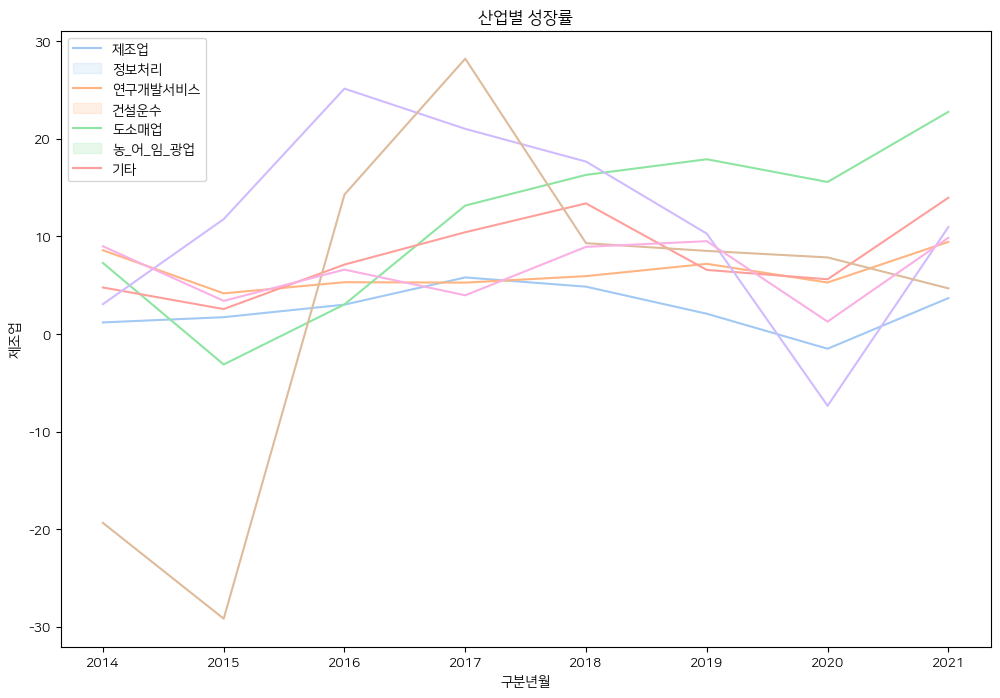

In [398]:
colors = ['black', 'lightpink', 'darkgray', 'hotpink', 'rosybrown', 'deeppink','darkorange']
sns.set_palette("pastel")

plt.figure(figsize=(12,8))
plt.title("산업별 성장률")
for i in range(len(get_past_tech_p.columns)):
    sns.lineplot(get_past_tech_p[get_past_tech_p.columns[i]],markers=True)
plt.legend(lengend)


In [529]:
print(all_industry["산업별 지수"].index)
all_industry

RangeIndex(start=0, stop=5, step=1)


,산업별 지수,2013.01,2013.02,2013.03,2013.04,2013.05,2013.06,2013.07,2013.08,2013.09,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11 p),2022.12 p)
0,전산업생산지수(농림어업 제외),95.900,97.300,95.400,96.800,96.800,96.600,96.400,97.200,96.600,...,117.3,116.3,117.1,118.0,117.8,117.7,117.2,115.4,115.9,114.0
1,광공업,100.815,99.717,98.379,99.213,99.510,99.701,98.765,100.173,98.938,...,121.2,117.3,117.6,119.7,118.2,116.6,114.3,110.4,111.1,107.9
2,건설업,88.025,92.171,91.715,97.754,96.356,97.302,97.512,96.089,97.929,...,108.5,108.3,114.2,112.8,109.4,113.5,113.9,119.7,123.0,111.3
3,서비스업,94.000,95.400,94.200,94.800,95.100,94.800,94.700,95.700,95.200,...,114.2,115.6,116.7,116.5,116.7,118.8,118.7,117.5,117.2,117.0
4,공공행정,94.700,105.200,94.100,100.600,97.400,95.000,96.500,94.900,95.200,...,129.0,123.0,120.4,125.1,129.7,117.8,121.5,118.7,123.1,121.8


In [530]:
all_industry_tp = all_industry.transpose()
# all_industry_tp["index"] = [0 for x in range(len(all_industry_tp.index))]

In [531]:
all_industry_cp = all_industry


In [532]:
all_industry_cp.set_index("산업별 지수")


,2013.01,2013.02,2013.03,2013.04,2013.05,2013.06,2013.07,2013.08,2013.09,2013.10,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11 p),2022.12 p)
산업별 지수,,,,,,,,,,,,,,,,,,,,,
전산업생산지수(농림어업 제외),95.900,97.300,95.400,96.800,96.800,96.600,96.400,97.200,96.600,97.800,...,117.3,116.3,117.1,118.0,117.8,117.7,117.2,115.4,115.9,114.0
광공업,100.815,99.717,98.379,99.213,99.510,99.701,98.765,100.173,98.938,100.843,...,121.2,117.3,117.6,119.7,118.2,116.6,114.3,110.4,111.1,107.9
건설업,88.025,92.171,91.715,97.754,96.356,97.302,97.512,96.089,97.929,99.367,...,108.5,108.3,114.2,112.8,109.4,113.5,113.9,119.7,123.0,111.3
서비스업,94.000,95.400,94.200,94.800,95.100,94.800,94.700,95.700,95.200,95.600,...,114.2,115.6,116.7,116.5,116.7,118.8,118.7,117.5,117.2,117.0
공공행정,94.700,105.200,94.100,100.600,97.400,95.000,96.500,94.900,95.200,98.500,...,129.0,123.0,120.4,125.1,129.7,117.8,121.5,118.7,123.1,121.8


In [533]:
all_industry_cp=all_industry_cp.transpose()

In [534]:
all_industry_cp.columns

RangeIndex(start=0, stop=5, step=1)

In [535]:
all_industry_tp.reset_index(drop=False, inplace=True)
all_industry_tp

,index,0,1,2,3,4
0,산업별 지수,전산업생산지수(농림어업 제외),광공업,건설업,서비스업,공공행정
1,2013.01,95.9,100.815,88.025,94.0,94.7
2,2013.02,97.3,99.717,92.171,95.4,105.2
3,2013.03,95.4,98.379,91.715,94.2,94.1
4,2013.04,96.8,99.213,97.754,94.8,100.6
...,...,...,...,...,...,...
116,2022.08,117.7,116.6,113.5,118.8,117.8
117,2022.09,117.2,114.3,113.9,118.7,121.5
118,2022.10,115.4,110.4,119.7,117.5,118.7
119,2022.11 p),115.9,111.1,123.0,117.2,123.1


In [536]:
Jan_all_industry = all_industry_tp['index'].str.contains("\.01")
Jan_all_industry


0      False
1       True
2      False
3      False
4      False
       ...  
116    False
117    False
118    False
119    False
120    False
Name: index, Length: 121, dtype: bool

In [537]:
Jan_all_industry = all_industry_tp[Jan_all_industry]
Jan_all_industry #1월 데이터만 추출

,index,0,1,2,3,4
1,2013.01,95.9,100.815,88.025,94.0,94.7
13,2014.01,98.7,101.318,100.518,97.1,97.4
25,2015.01,97.8,97.7,97.2,97.9,97.4
37,2016.01,100.2,99.0,104.7,100.5,99.5
49,2017.01,105.0,106.3,122.0,103.2,100.2
61,2018.01,107.0,105.2,135.3,105.7,102.9
73,2019.01,108.2,105.4,126.1,108.3,106.5
85,2020.01,110.6,108.3,123.4,110.4,112.6
97,2021.01,109.5,111.8,108.3,106.9,119.1
109,2022.01,115.7,119.4,115.3,112.8,120.5


In [538]:
all_industry_list = all_industry["산업별 지수"].values

In [539]:
all_industry_list

array(['전산업생산지수(농림어업 제외)', '광공업', '건설업', '서비스업', '공공행정'], dtype=object)

In [540]:
for i in range(0,len(all_industry_list)):
    Jan_all_industry.rename(columns ={Jan_all_industry.columns[i+1]:all_industry_list[i]}, inplace= True)
Jan_all_industry

/var/folders/s0/5rhprztj2xs1kzwd87bwg_y00000gn/T/ipykernel_2375/3253178730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jan_all_industry.rename(columns ={Jan_all_industry.columns[i+1]:all_industry_list[i]}, inplace= True)
/var/folders/s0/5rhprztj2xs1kzwd87bwg_y00000gn/T/ipykernel_2375/3253178730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jan_all_industry.rename(columns ={Jan_all_industry.columns[i+1]:all_industry_list[i]}, inplace= True)
/var/folders/s0/5rhprztj2xs1kzwd87bwg_y00000gn/T/ipykernel_2375/3253178730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,index,전산업생산지수(농림어업 제외),광공업,건설업,서비스업,공공행정
1,2013.01,95.9,100.815,88.025,94.0,94.7
13,2014.01,98.7,101.318,100.518,97.1,97.4
25,2015.01,97.8,97.7,97.2,97.9,97.4
37,2016.01,100.2,99.0,104.7,100.5,99.5
49,2017.01,105.0,106.3,122.0,103.2,100.2
61,2018.01,107.0,105.2,135.3,105.7,102.9
73,2019.01,108.2,105.4,126.1,108.3,106.5
85,2020.01,110.6,108.3,123.4,110.4,112.6
97,2021.01,109.5,111.8,108.3,106.9,119.1
109,2022.01,115.7,119.4,115.3,112.8,120.5


In [542]:
Jan_all_industry.to_csv("all_industry.csv", encoding="utf-8")

In [558]:
Jan_all_industry = Jan_all_industry.set_index('index')
Jan_all_industry

KeyError: "None of ['index'] are in the columns"

In [559]:
Jan_all_industry = Jan_all_industry.transpose()


In [568]:
Jan_all_industry= Jan_all_industry.transpose()

In [577]:
Jan_all_industry

index,2013.01,2014.01,2015.01,2016.01,2017.01,2018.01,2019.01,2020.01,2021.01,2022.01
전산업생산지수(농림어업 제외),95.9,98.7,97.8,100.2,105.0,107.0,108.2,110.6,109.5,115.7
광공업,100.815,101.318,97.7,99.0,106.3,105.2,105.4,108.3,111.8,119.4
건설업,88.025,100.518,97.2,104.7,122.0,135.3,126.1,123.4,108.3,115.3
서비스업,94.0,97.1,97.9,100.5,103.2,105.7,108.3,110.4,106.9,112.8
공공행정,94.7,97.4,97.4,99.5,100.2,102.9,106.5,112.6,119.1,120.5


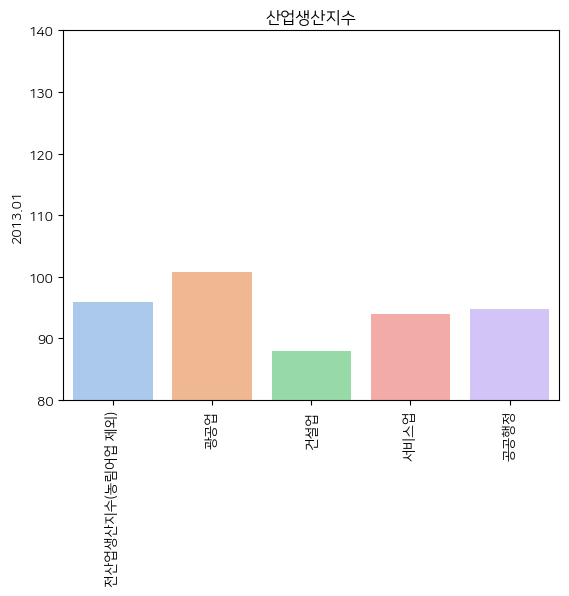

In [593]:
sns.set_palette("pastel")
# 전산업생산지수(농림어업 제외)	광공업	건설업	서비스업	공공행정
plt.title("산업생산지수")
ind_df = Jan_all_industry['2013.01']
sns.barplot(x = Jan_all_industry.index, y= ind_df)
# sns.countplot(data=survey_df , x = "Age", order = age_order)
plt.ylim(80, 140)
plt.xticks(rotation = 90)
plt.show()

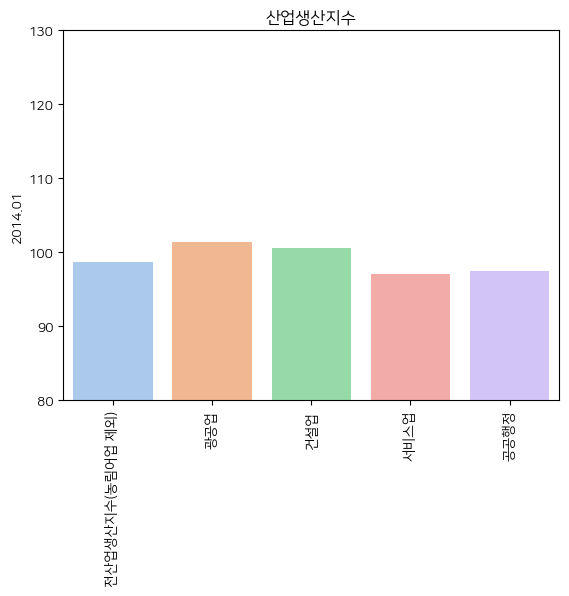

In [594]:
sns.set_palette("pastel")
# 전산업생산지수(농림어업 제외)	광공업	건설업	서비스업	공공행정
plt.title("산업생산지수")
ind_df = Jan_all_industry['2014.01']
sns.barplot(x = Jan_all_industry.index, y= ind_df)
# sns.countplot(data=survey_df , x = "Age", order = age_order)
plt.ylim(80, 130)
plt.xticks(rotation = 90)
plt.show()

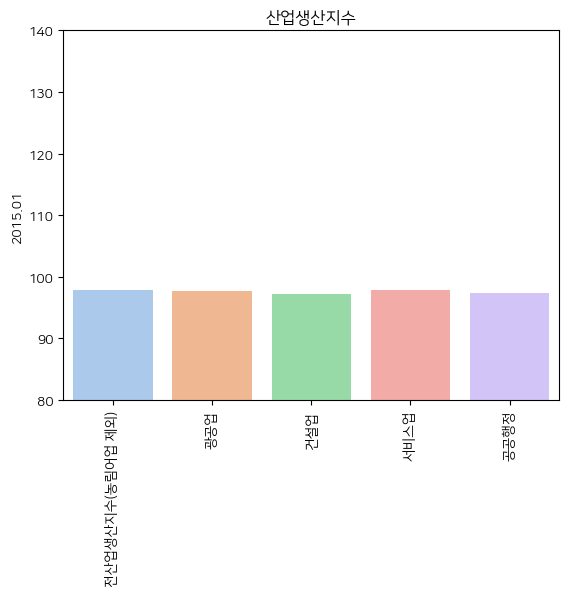

In [595]:
sns.set_palette("pastel")
# 전산업생산지수(농림어업 제외)	광공업	건설업	서비스업	공공행정
plt.title("산업생산지수")
ind_df = Jan_all_industry['2015.01']
sns.barplot(x = Jan_all_industry.index, y= ind_df)
# sns.countplot(data=survey_df , x = "Age", order = age_order)
plt.ylim(80, 140)
plt.xticks(rotation = 90)
plt.show()

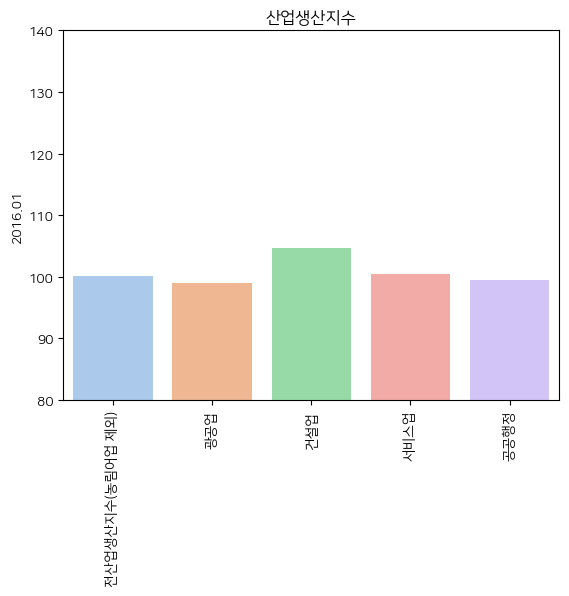

In [596]:
sns.set_palette("pastel")
# 전산업생산지수(농림어업 제외)	광공업	건설업	서비스업	공공행정
plt.title("산업생산지수")
ind_df = Jan_all_industry['2016.01']
sns.barplot(x = Jan_all_industry.index, y= ind_df)
# sns.countplot(data=survey_df , x = "Age", order = age_order)
plt.ylim(80, 140)
plt.xticks(rotation = 90)
plt.show()

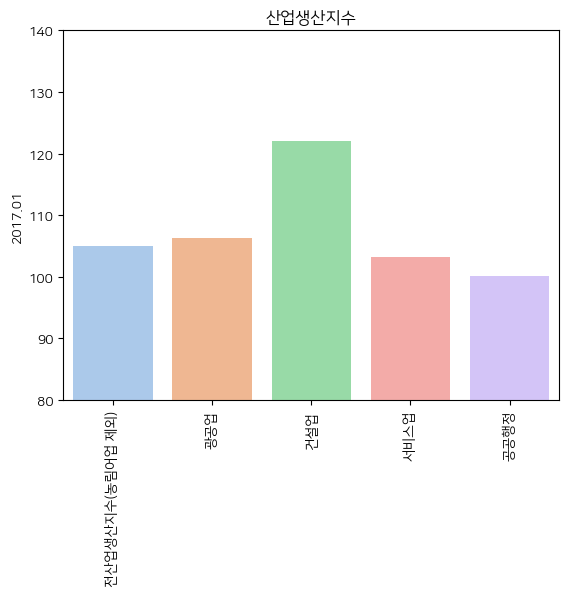

In [597]:
sns.set_palette("pastel")
# 전산업생산지수(농림어업 제외)	광공업	건설업	서비스업	공공행정
plt.title("산업생산지수")
ind_df = Jan_all_industry['2017.01']
sns.barplot(x = Jan_all_industry.index, y= ind_df)
# sns.countplot(data=survey_df , x = "Age", order = age_order)
plt.ylim(80, 140)
plt.xticks(rotation = 90)
plt.show()

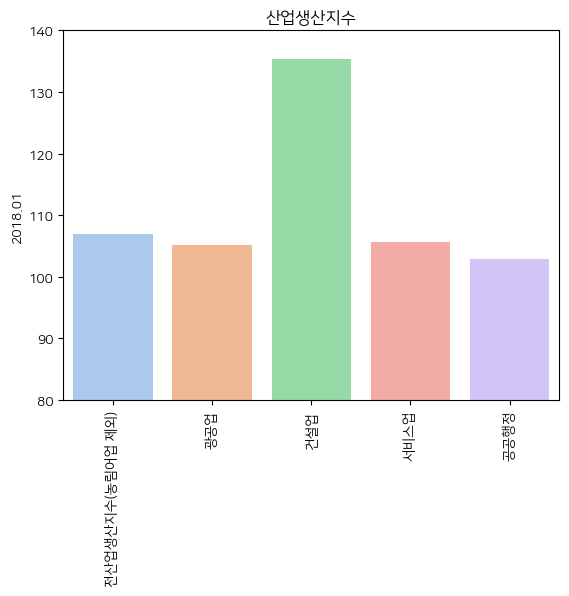

In [598]:
sns.set_palette("pastel")
# 전산업생산지수(농림어업 제외)	광공업	건설업	서비스업	공공행정
plt.title("산업생산지수")
ind_df = Jan_all_industry['2018.01']
sns.barplot(x = Jan_all_industry.index, y= ind_df)
# sns.countplot(data=survey_df , x = "Age", order = age_order)
plt.ylim(80, 140)
plt.xticks(rotation = 90)
plt.show()

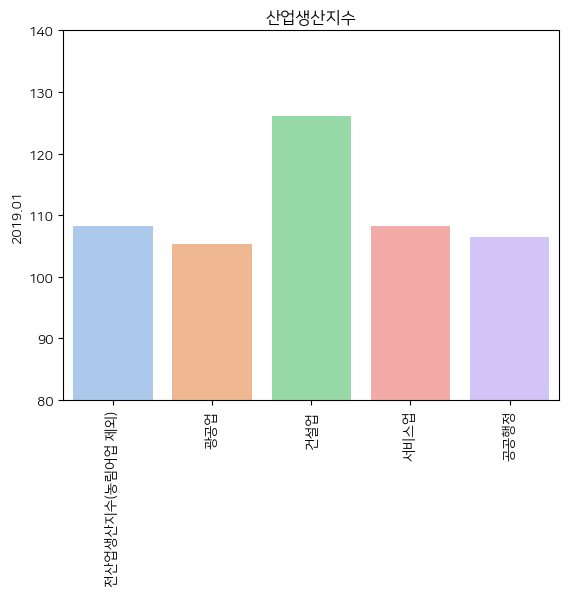

In [599]:
sns.set_palette("pastel")
# 전산업생산지수(농림어업 제외)	광공업	건설업	서비스업	공공행정
plt.title("산업생산지수")
ind_df = Jan_all_industry['2019.01']
sns.barplot(x = Jan_all_industry.index, y= ind_df)
# sns.countplot(data=survey_df , x = "Age", order = age_order)
plt.ylim(80, 140)
plt.xticks(rotation = 90)
plt.show()

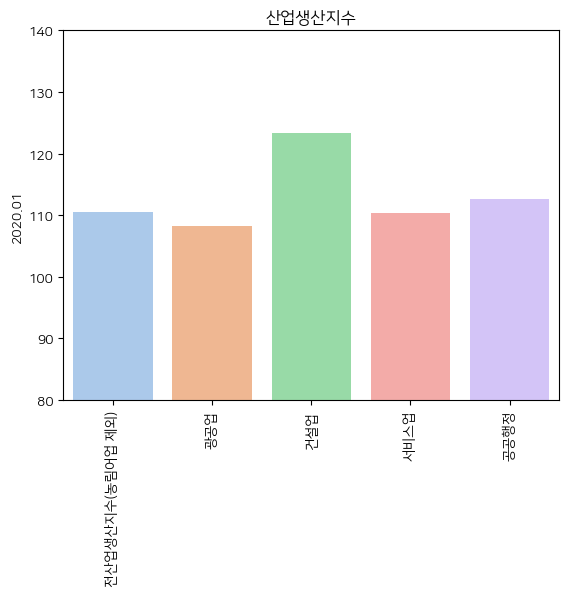

In [600]:
sns.set_palette("pastel")
# 전산업생산지수(농림어업 제외)	광공업	건설업	서비스업	공공행정
plt.title("산업생산지수")
ind_df = Jan_all_industry['2020.01']
sns.barplot(x = Jan_all_industry.index, y= ind_df)
# sns.countplot(data=survey_df , x = "Age", order = age_order)
plt.ylim(80, 140)
plt.xticks(rotation = 90)
plt.show()